In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Basic Data Science and ML Pipeline**

**OSEMN Pipeline**

* O - Obtaining our data
* S - Scrubbing / Cleaning our data
* E - Exploring / Visualizing our data will allow us to find patterns and trends
* M - Modeling our data will give us our predictive power as a wizard
* N - INterpreting our data

In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Basic EDA and statistical analysis**

In [ ]:
## gives information about the data types,columns, null value counts, memory usage etc
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.


In [ ]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**The Question creeping out of this summary**

Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [ ]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of NaNs
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**To fill these Nan values the data distribution needs to be understood**

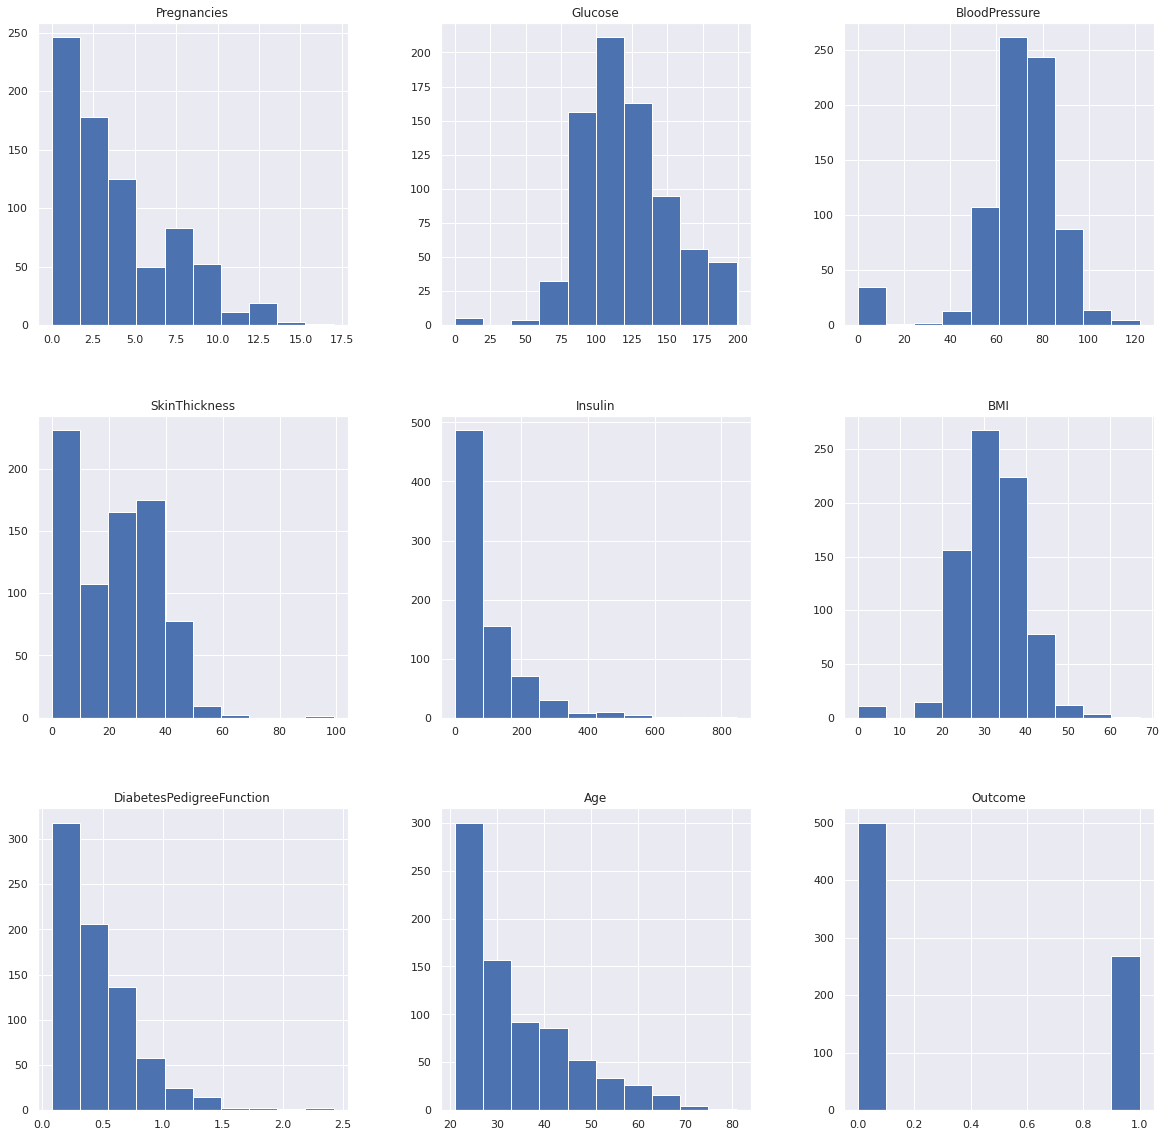

In [ ]:
p = diabetes_data.hist(figsize = (20,20))

**Aiming to impute nan values for the columns in accordance with their distribution**

In [ ]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

**Plotting after Nan removal**

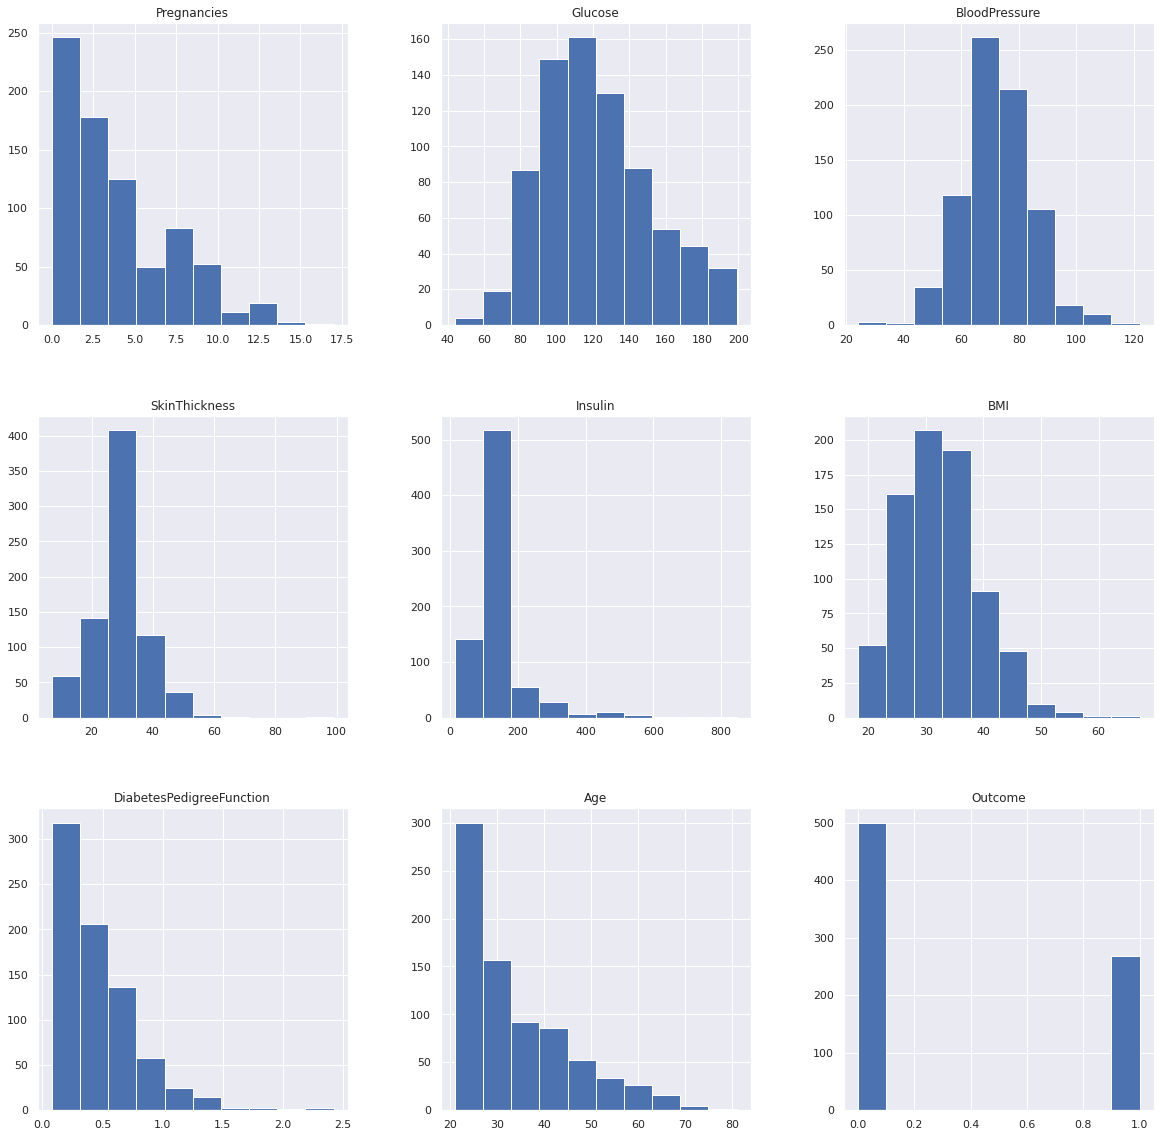

In [ ]:
p = diabetes_data_copy.hist(figsize = (20,20))

In [ ]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

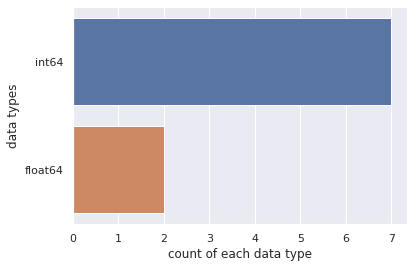

In [ ]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

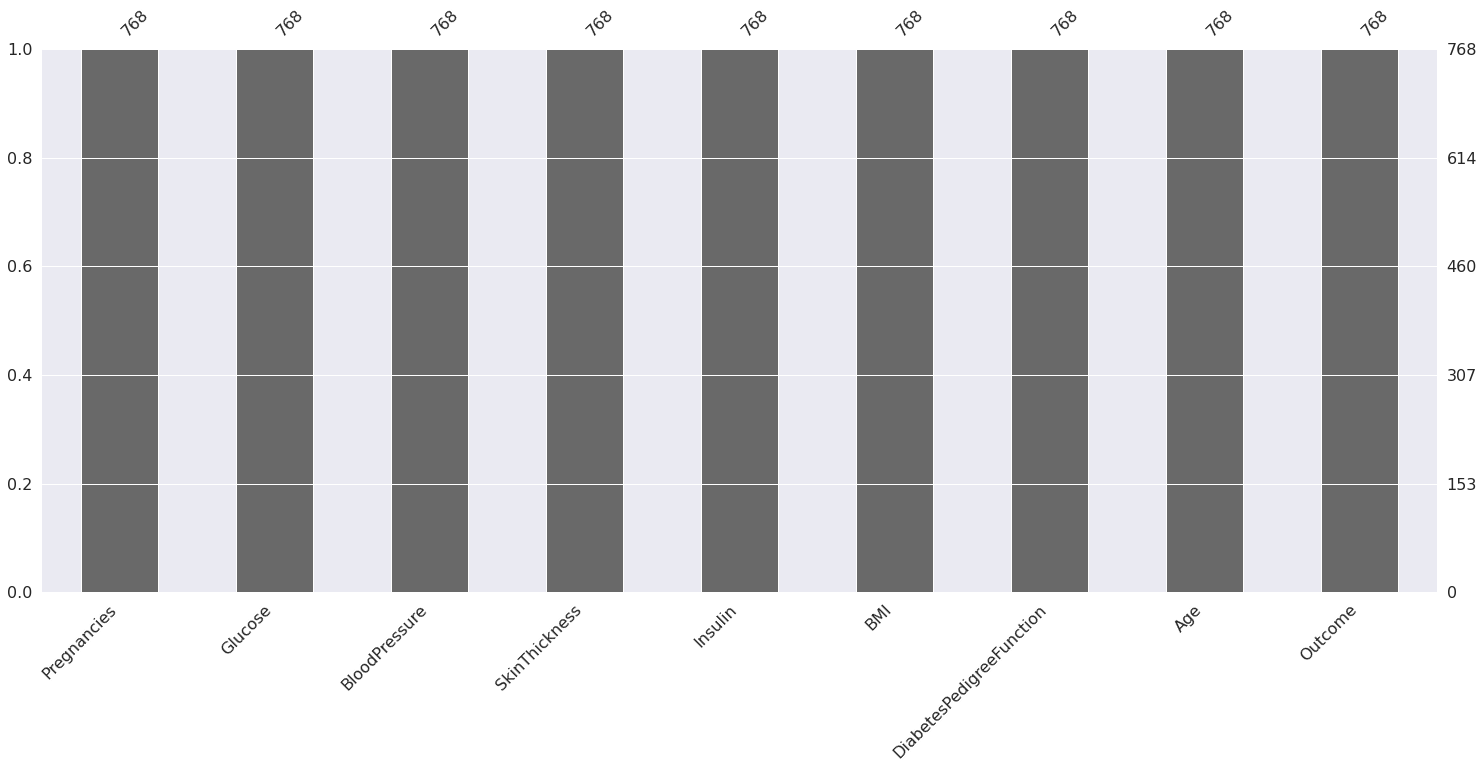

In [ ]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data)

0    500
1    268
Name: Outcome, dtype: int64


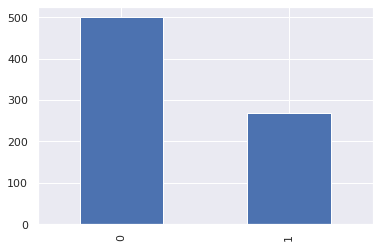

In [ ]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

**The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients.**

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

**Why Scaling the data for KNN?**

* it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.

* Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

**Test Train Split and Cross Validation methods**
     
* Train Test Split : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

**Cross Validation:** 

* When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

**About Stratify :** 

* Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
X_test_later = X_test[:3]
X_test = X_test[3:]

y_test_later = y_test[:3]
y_test = y_test[3:]

**MODEL - 1 --> KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

test_scores = []
# train_scores = []
f1_scores_test = []
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    # print(cnf_matrix[0,0])

    tp = cnf_matrix[0,0]
    fp = cnf_matrix[0,1]
    tn = cnf_matrix[1,1]
    fn = cnf_matrix[1,0]
    total_sum = cnf_matrix.sum()
    acc = (tp + tn)/total_sum
    recall = tp/(tp+fn)
    prec = tp/(tp+fp)
    f1 = 2*(prec*recall)/(prec+recall)
    test_scores.append(acc)
    f1_scores_test.append(f1)

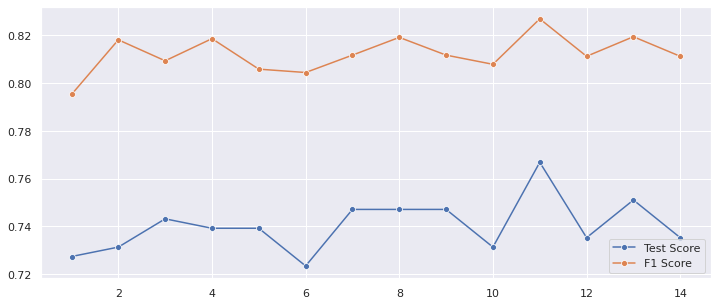

In [ ]:
plt.figure(figsize=(12,5))
# p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
t = sns.lineplot(range(1,15),f1_scores_test,marker='o',label='F1 Score')

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.6798418972332 % and k = [11]


**Result Visualisation**

**The best result is captured at k = 11 hence 11 is used for the final model**

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.766798418972332

**Model Performance Analysis**

**1. Confusion Matrix**

* The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Text(0.5, 12.5, 'Predicted label')

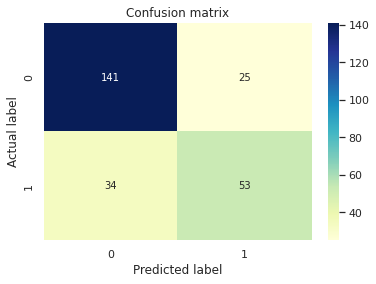

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**2. Classification Report**
* Report which includes Precision, Recall and F1-Score.

Precision Score
    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)


Recall Score¶
    FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)

F1 Score
    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall. 
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)



**Precision -**
* Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

**Recall (Sensitivity) -** 
* Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

**F1 score -** 
* F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)



**3. ROC - AUC**

* ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

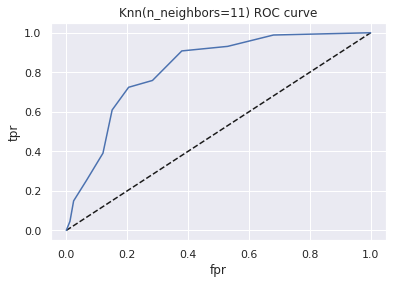

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8174421825231961

**MODEL - 2 --> Logitic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression as lr

test_scores_test = []
f1_scores_test = []

for i in range(1,11):
  clf = lr(C=i,max_iter = 1000+10*i).fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  # print(cnf_matrix[0,0])

  tp = cnf_matrix[0,0]
  fp = cnf_matrix[0,1]
  tn = cnf_matrix[1,1]
  fn = cnf_matrix[1,0]
  total_sum = cnf_matrix.sum()
  acc = (tp + tn)/total_sum
  recall = tp/(tp+fn)
  prec = tp/(tp+fp)
  f1 = 2*(prec*recall)/(prec+recall)
  test_scores_test.append(acc)
  f1_scores_test.append(f1)

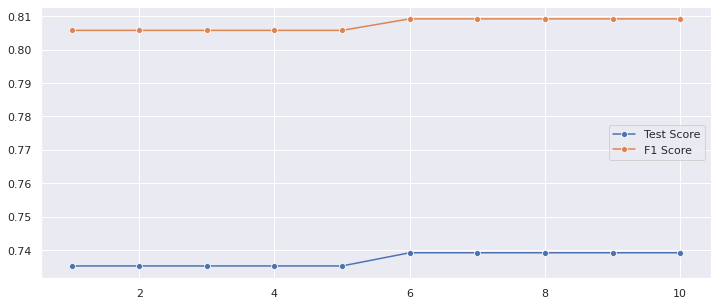

In [ ]:
plt.figure(figsize=(12,5))
# p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,11),test_scores_test,marker='o',label='Test Score')
t = sns.lineplot(range(1,11),f1_scores_test,marker='o',label='F1 Score')

In [ ]:
max_score = max(test_scores_test)
scores_ind = [i for i, v in enumerate(test_scores_test) if v == max_score]
# scores_ind

print('Max Accuracy', max_score*100)
print('max_depth',scores_ind[0]+1)

Max Accuracy 73.91304347826086
max_depth 6


In [ ]:
clf = lr(C = scores_ind[0]+1,max_iter = 1000+10*(scores_ind[0]+1)).fit(X_train, y_train)

y_pred = clf.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

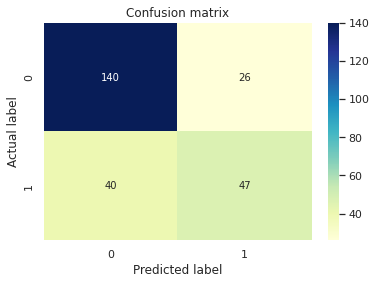

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**MODEL - 3 --> RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as dtc

test_scores = []
# train_scores = []
f1_scores_test = []
for i in range(1,15):

    clf = dtc(max_depth = i*100)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    # print(cnf_matrix[0,0])

    tp = cnf_matrix[0,0]
    fp = cnf_matrix[0,1]
    tn = cnf_matrix[1,1]
    fn = cnf_matrix[1,0]
    total_sum = cnf_matrix.sum()
    acc = (tp + tn)/total_sum
    recall = tp/(tp+fn)
    prec = tp/(tp+fp)
    f1 = 2*(prec*recall)/(prec+recall)
    test_scores.append(acc)
    f1_scores_test.append(f1)

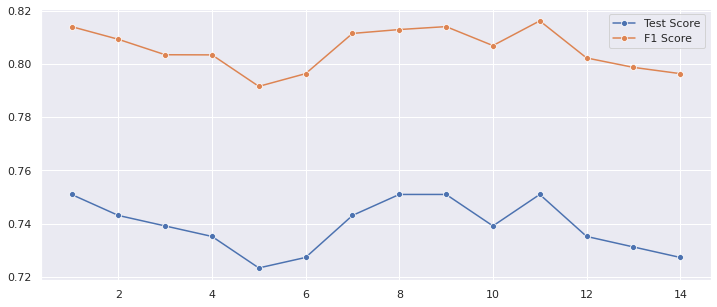

In [ ]:
plt.figure(figsize=(12,5))
# p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
t = sns.lineplot(range(1,15),f1_scores_test,marker='o',label='F1 Score')

In [ ]:
max_score = max(test_scores)
scores_ind = [i for i, v in enumerate(test_scores) if v == max_score]
scores_ind

print('Max Accuracy', max_score*100)
print('max_depth',scores_ind[0]+1)

Max Accuracy 75.09881422924902
max_depth 1


In [ ]:
#Setup a knn classifier with k neighbors
clf = dtc(max_depth = scores_ind[0]+1)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

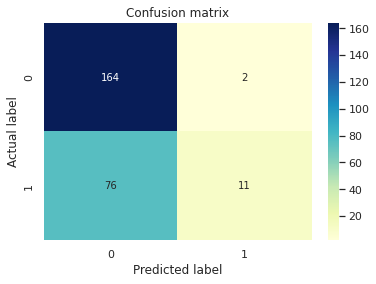

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

***BEST is KNN***

In [ ]:
# print(X_test_later.iloc[0])
pred = knn.predict([X_test_later.iloc[0]])

print(y_test_later.iloc[0] == pred)

[ True]


In [ ]:
pred = knn.predict([X_test_later.iloc[1]])

y_test_later.iloc[1] == pred

array([ True])

In [ ]:
pred = knn.predict([X_test_later.iloc[2]])

y_test_later.iloc[2] == pred

array([False])